In [14]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt

# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Counts of Job Titles

In [15]:
# Size: counts all rows in group (Value/Column not requried)
# Count: counts non-NA values in each group(Value/Column requried)
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

## Median salary of the job title

In [16]:
df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


## Median salary of the job title based on country

In [17]:
# this is the orgininal code
#df.pivot_table(index='job_title_short', values='salary_year_avg', columns='job_country', aggfunc='median')
#but because  i like long tables not wide one so im gonna filp between index and column
df.pivot_table(index='job_country', values='salary_year_avg', columns='job_title_short', aggfunc='median')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


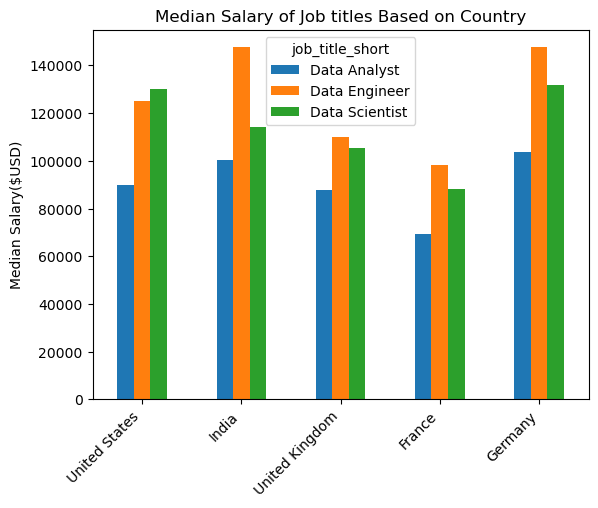

In [24]:
# value_counts() counting how many the [''] repeated in dataset head(5) selecting the top 5
# based on that we selecting the top country based on thier reptation on datasets 
# index cuz we only want the index that contains country names without the values

top_countries = df['job_country'].value_counts().head(5).index

# pivot table show median yearly salary of job titles based on countries
median_pivot = df.pivot_table(index='job_country', values='salary_year_avg', columns='job_title_short', aggfunc='median')

# by using loc[] we import that pivot table of median_pivot and we filter it by top_countries
median_pivot = median_pivot.loc[top_countries]

# Now we want only Data Analyst, Data Engineer, Data Scientist
job_chosen = ["Data Analyst", "Data Engineer", "Data Scientist"]
# here cuz we dont have index and we have list instead we will use median_pivot[job_chosen] to filter
median_pivot = median_pivot[job_chosen]

# Now visualization
median_pivot.plot(kind='bar' , title='Median Salary of Job titles Based on Country',xlabel='', ylabel='Median Salary($USD)')
plt.xticks(rotation=45, ha='right')
plt.show()
